<a href="https://www.kaggle.com/code/assil22/heart-disease-prediction?scriptVersionId=279113020" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df=pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

# Overview of the data

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.shape

(1025, 14)

# check for missing values

In [5]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.isnull().values.any()

False

# Target variable distribution

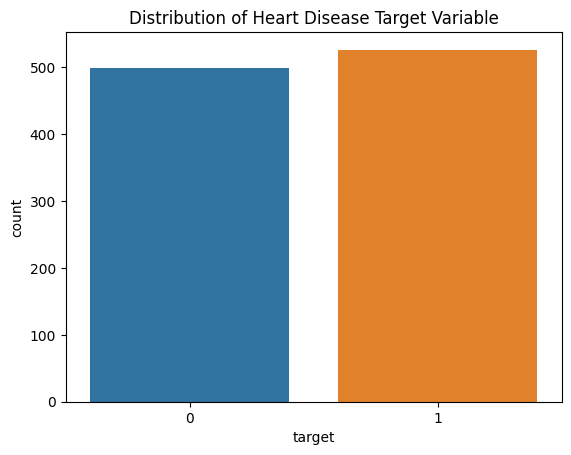

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease Target Variable')
plt.show()

#  Distribution of numeric features

In [8]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

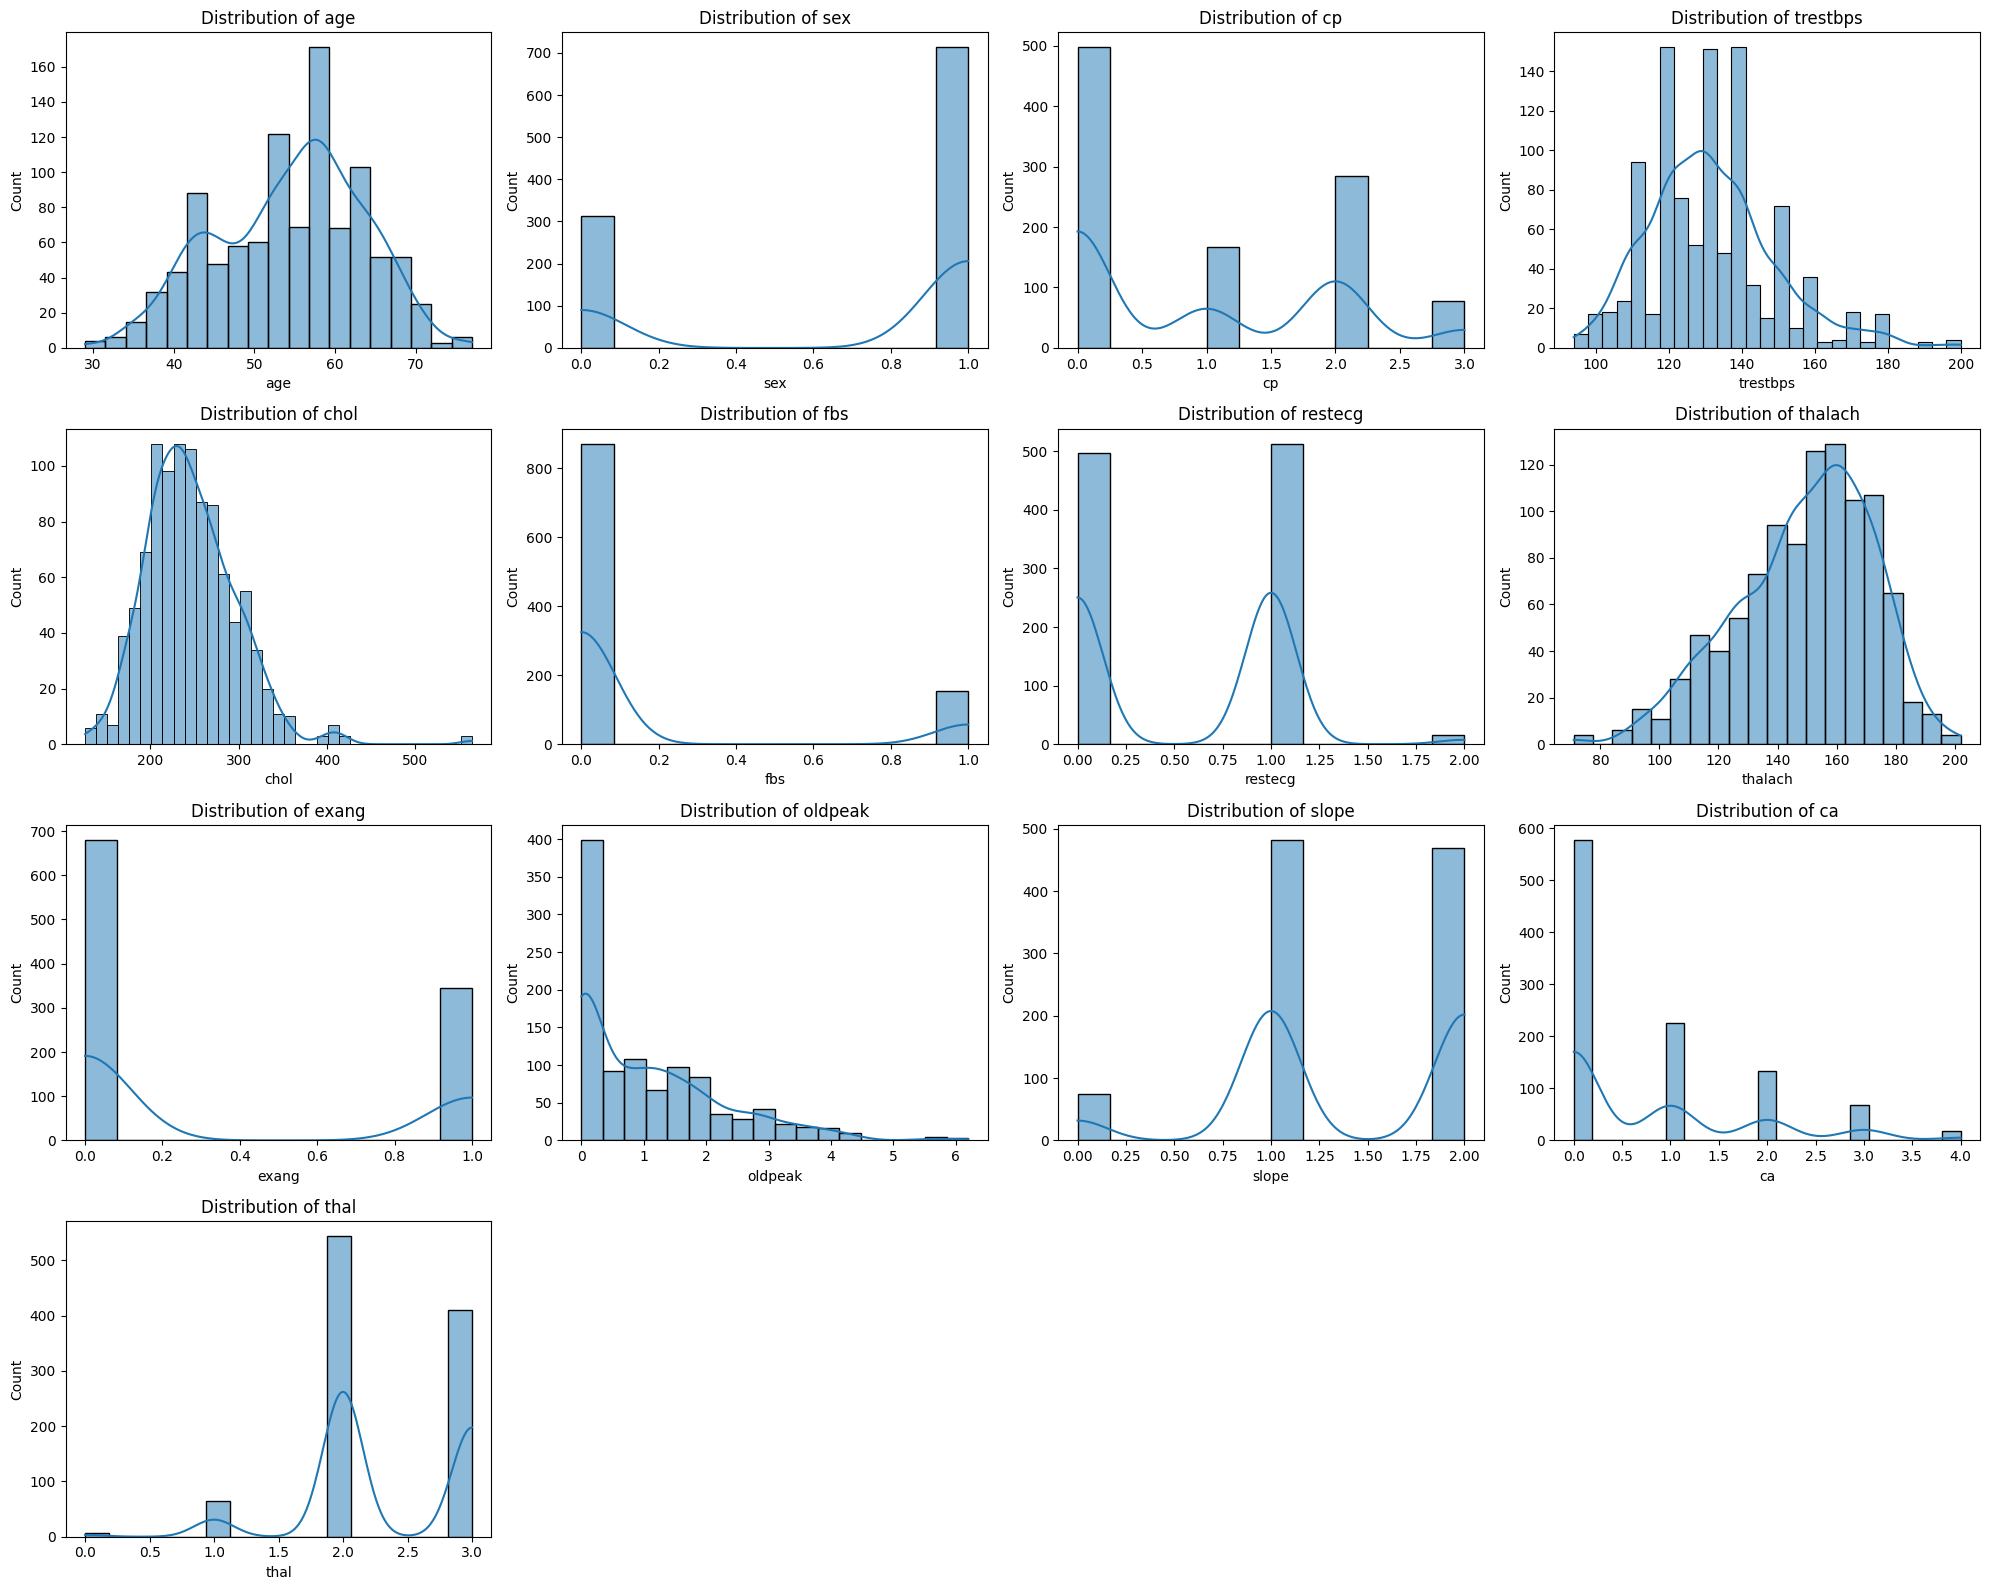

In [9]:
import math

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('target')  

n = len(num_cols)
cols = 4  
rows = math.ceil(n / cols)  

plt.figure(figsize=(5 * cols, 4 * rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Correlation heatmap

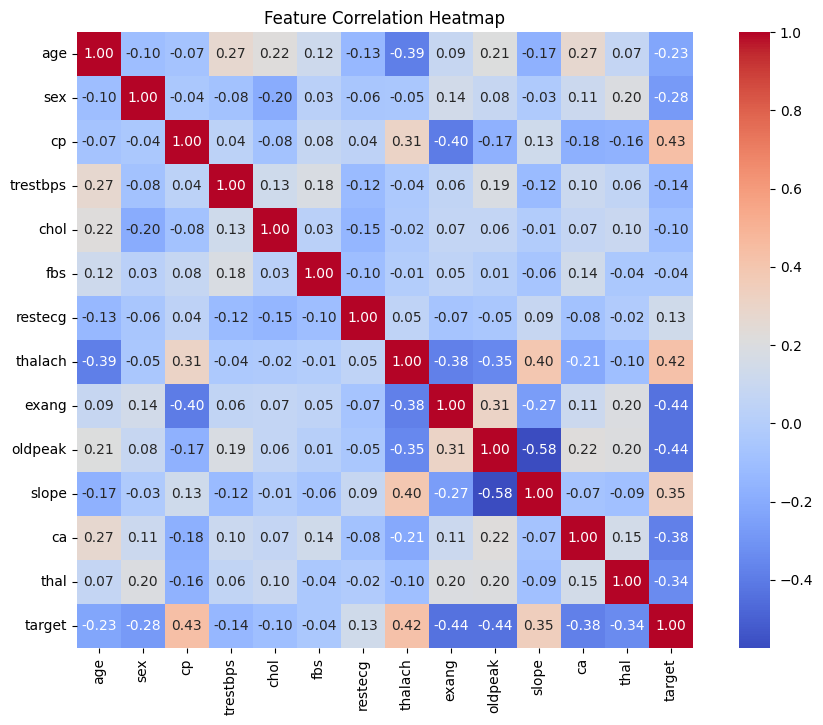

In [10]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# Splitting Features and Target

In [11]:
X=df.loc[:,df.columns!='target']
Y=df.loc[:,'target']
#or : iloc selects data by numerical position : 
#X=df.iloc[:,:-1] 
#Y=df.iloc[:,-1]

# Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

In [13]:
print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (820, 13)
Test shape: (205, 13)


# Models used

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models= {
    'logistic regression': LogisticRegression(max_iter=1000, random_state=42),
    'naive bayes': GaussianNB(),
    'SVM':SVC(probability=True, kernel='rbf', C=1.0, random_state=42),
    'decision tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)   
    }


# Model Evaluation :
        (Confusion Matrix + Metrics) 

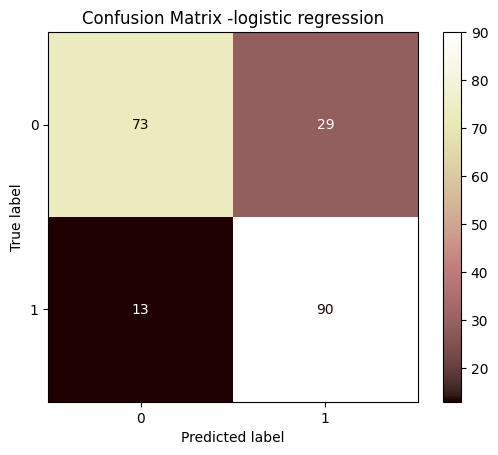

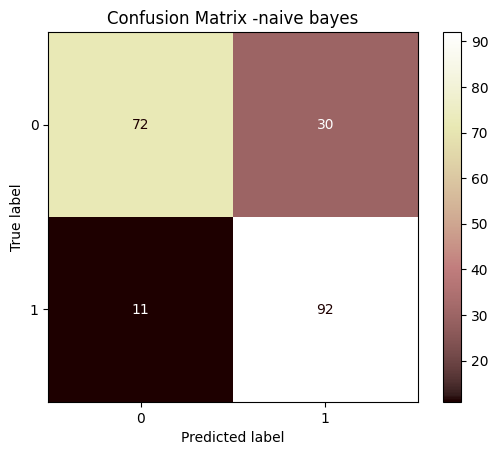

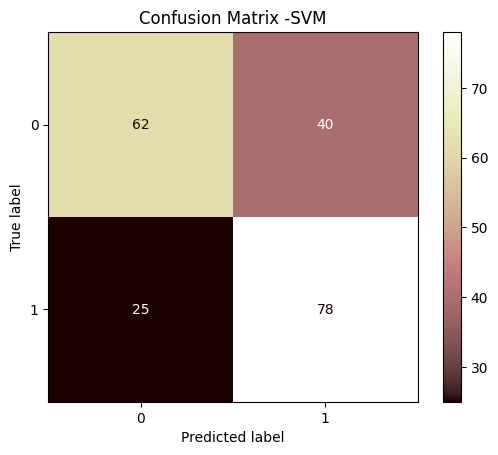

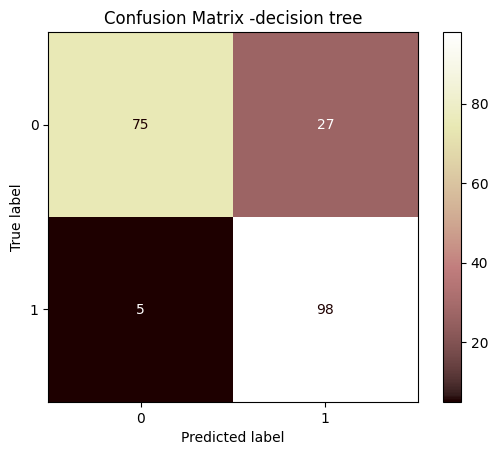

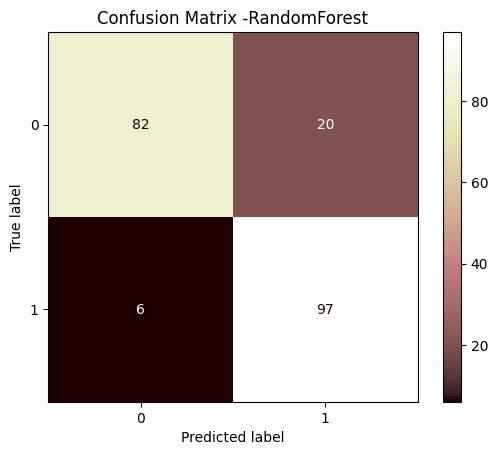

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

res={}

for model_name, model in models.items(): 
    
    #train 
    model.fit(X_train, Y_train)
    
    #make predictions on the test set
    Y_pred=model.predict(X_test)
    
    #confusion matrix 
    cm= confusion_matrix(Y_test,Y_pred)

    disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(cmap=plt.cm.pink)
    plt.title(f"Confusion Matrix -{model_name}")
    plt.savefig(f"Confusion Matrix -{model_name}.png")
    plt.show()
    plt.close()

 #classification report
    report=classification_report(Y_test, Y_pred, output_dict=True)   #report contains metrics, output_dict means the result returned in a dict 
    res[model_name]={   #metrics sauvegardes in res
        'accuracy':report['accuracy'],
        'precision':report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score':report['1']['f1-score']    
        }

In [16]:
print("\n Model Performance Metrics")
for model, metrics in res.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")



 Model Performance Metrics

logistic regression:
  accuracy: 0.7951
  precision: 0.7563
  recall: 0.8738
  f1-score: 0.8108

naive bayes:
  accuracy: 0.8000
  precision: 0.7541
  recall: 0.8932
  f1-score: 0.8178

SVM:
  accuracy: 0.6829
  precision: 0.6610
  recall: 0.7573
  f1-score: 0.7059

decision tree:
  accuracy: 0.8439
  precision: 0.7840
  recall: 0.9515
  f1-score: 0.8596

RandomForest:
  accuracy: 0.8732
  precision: 0.8291
  recall: 0.9417
  f1-score: 0.8818


# plot accuracies 

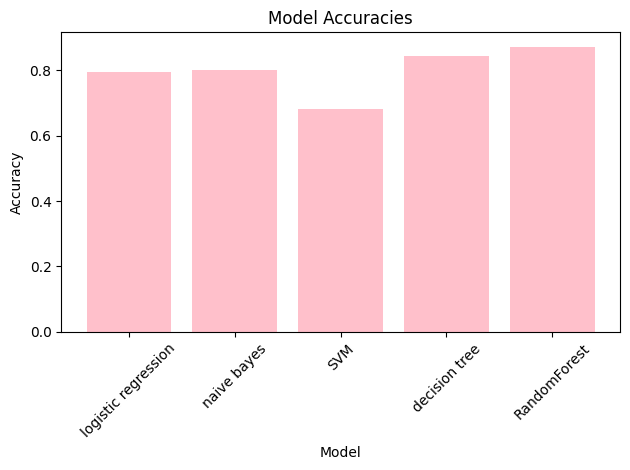

In [17]:
accuracies={model_name:metrics['accuracy'] for model_name,metrics in res.items()}
plt.bar(accuracies.keys(), accuracies.values(), color='pink')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Model Accuracies')
plt.xticks(rotation=45)  #rotate the the label in the plot
plt.tight_layout()  #automatically adjust the spacing of the elts
plt.savefig("model_accuracies.png")
plt.show()

# The best model

In [18]:
Best_model=max(accuracies, key=accuracies.get)  #fction max finds the key with the highest value in the dict  
print(f"the best model is {Best_model} with accuracy {accuracies[Best_model]:.2f}")

the best model is RandomForest with accuracy 0.87
